In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

In [2]:
auto_clave = pd.read_excel("C:/lgaimers/Auto clave.xlsx")

auto_clave

,Collect Item:,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,2nd Pressure.2,3rd Pressure,3rd Pressure.1,3rd Pressure.2,Chamber Temp.,Chamber Temp..1,Chamber Temp..2,GMES_ORIGIN_INSP_JUDGE_CODE,GMES_ORIGIN_INSP_JUDGE_CODE.1,GMES_ORIGIN_INSP_JUDGE_CODE.2
0,Wip Line,Process Desc.,Equipment,Model.Suffix,Workorder,LOT ID,Set ID,Box ID,Collect Date,Insp. Seq No.,...,Judge Value,Collect Result,Unit Time,Judge Value,Collect Result,Unit Time,Judge Value,Collect Result,Unit Time,Judge Value
1,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000002,OP753345013050000002,NaN,2023-05-04 09:29:00,1,...,OK,0.503,90,OK,56,510,OK,NaN,NaN,NaN
2,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000003,OP753345013050000003,NaN,2023-05-04 09:49:12,1,...,OK,0.501,90,OK,50,510,OK,NaN,NaN,NaN
3,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000004,OP753345013050000004,NaN,2023-05-04 09:49:12,1,...,OK,0.501,90,OK,50,510,OK,NaN,NaN,NaN
4,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000005,OP753345013050000005,NaN,2023-05-04 09:49:12,1,...,OK,0.501,90,OK,50,510,OK,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61048,IVI-OB6,Auto Clave Out,Auto Clave Out,EAT65200901,4EPM0222-2,OP652009014040000066,OP652009014040000066,NaN,2024-04-20 12:03:45,1,...,OK,0.499,120,OK,35,360,OK,NaN,NaN,NaN
61049,IVI-OB6,Auto Clave Out,Auto Clave Out,EAT65200901,4EPM0222-2,OP652009014040000067,OP652009014040000067,NaN,2024-04-20 12:03:45,1,...,OK,0.499,120,OK,35,360,OK,NaN,NaN,NaN
61050,IVI-OB6,Auto Clave Out,Auto Clave Out,EAT65200901,4EPM0222-2,OP652009014040000068,OP652009014040000068,NaN,2024-04-20 11:52:26,1,...,OK,0.5,120,OK,36,360,OK,NaN,NaN,NaN
61051,IVI-OB6,Auto Clave Out,Auto Clave Out,EAT65200901,4EPM0222-2,OP652009014040000069,OP652009014040000069,NaN,2024-04-20 11:52:26,1,...,OK,0.5,120,OK,36,360,OK,NaN,NaN,NaN


In [3]:
auto_clave.columns

Index(['Collect Item:', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', '1st Pressure', '1st Pressure.1', '1st Pressure.2',
       '2nd Pressure', '2nd Pressure.1', '2nd Pressure.2', '3rd Pressure',
       '3rd Pressure.1', '3rd Pressure.2', 'Chamber Temp.', 'Chamber Temp..1',
       'Chamber Temp..2', 'GMES_ORIGIN_INSP_JUDGE_CODE',
       'GMES_ORIGIN_INSP_JUDGE_CODE.1', 'GMES_ORIGIN_INSP_JUDGE_CODE.2'],
      dtype='object')

In [5]:
dam_dispensing = pd.read_excel("C:/lgaimers/Dam dispensing.xlsx")

dam_dispensing

,Collect Item:,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,THICKNESS 2,THICKNESS 2.1,THICKNESS 2.2,THICKNESS 3,THICKNESS 3.1,THICKNESS 3.2,WorkMode,WorkMode.1,WorkMode.2,Unnamed: 221
0,Wip Line,Process Desc.,Equipment,Model.Suffix,Workorder,LOT ID,Set ID,Box ID,Collect Date,Insp. Seq No.,...,Collect Result,Unit Time,Judge Value,Collect Result,Unit Time,Judge Value,Collect Result,Unit Time,Judge Value,NaN
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000002,OP753345013050000002,NaN,2023-05-04 08:57:23,1,...,0,NaN,NaN,0,NaN,NaN,7,NaN,NaN,NaN
2,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000003,OP753345013050000003,NaN,2023-05-04 09:11:35,1,...,0,NaN,NaN,0,NaN,NaN,7,NaN,NaN,NaN
3,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000004,OP753345013050000004,NaN,2023-05-04 09:13:19,1,...,0,NaN,NaN,0,NaN,NaN,7,NaN,NaN,NaN
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000005,OP753345013050000005,NaN,2023-05-04 09:15:24,1,...,0,NaN,NaN,0,NaN,NaN,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62475,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002685,OP753345054040002685,NaN,2024-04-28 18:30:42,1,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,7.0
62476,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002686,OP753345054040002686,NaN,2024-04-28 18:31:43,1,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,7.0
62477,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002687,OP753345054040002687,NaN,2024-04-28 18:32:49,1,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,7.0
62478,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002688,OP753345054040002688,NaN,2024-04-28 18:33:51,1,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,7.0


In [6]:
dam_dispensing.columns

Index(['Collect Item:', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'THICKNESS 2', 'THICKNESS 2.1', 'THICKNESS 2.2', 'THICKNESS 3',
       'THICKNESS 3.1', 'THICKNESS 3.2', 'WorkMode', 'WorkMode.1',
       'WorkMode.2', 'Unnamed: 221'],
      dtype='object', length=222)

In [7]:
data3 = pd.read_excel("C:\lgaimers\Fill1 dispensing.xlsx")

data3   

,Collect Item:,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Production Qty,Production Qty.1,Production Qty.2,Receip No,Receip No.1,Receip No.2,WorkMode,WorkMode.1,WorkMode.2,Unnamed: 101
0,Wip Line,Process Desc.,Equipment,Model.Suffix,Workorder,LOT ID,Set ID,Box ID,Collect Date,Insp. Seq No.,...,Collect Result,Unit Time,Judge Value,Collect Result,Unit Time,Judge Value,Collect Result,Unit Time,Judge Value,NaN
1,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000002,OP753345013050000002,NaN,2023-05-04 08:59:27,1,...,1,NaN,NaN,1,NaN,NaN,7,NaN,NaN,NaN
2,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000003,OP753345013050000003,NaN,2023-05-04 09:13:39,1,...,2,NaN,NaN,1,NaN,NaN,7,NaN,NaN,NaN
3,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000004,OP753345013050000004,NaN,2023-05-04 09:15:42,1,...,3,NaN,NaN,1,NaN,NaN,7,NaN,NaN,NaN
4,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000005,OP753345013050000005,NaN,2023-05-04 09:17:46,1,...,4,NaN,NaN,1,NaN,NaN,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61924,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002685,OP753345054040002685,NaN,2024-04-28 18:32:28,1,...,11,NaN,NaN,435,NaN,NaN,1,NaN,NaN,7.0
61925,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002686,OP753345054040002686,NaN,2024-04-28 18:33:32,1,...,5,NaN,NaN,436,NaN,NaN,1,NaN,NaN,7.0
61926,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002687,OP753345054040002687,NaN,2024-04-28 18:34:36,1,...,12,NaN,NaN,437,NaN,NaN,1,NaN,NaN,7.0
61927,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002688,OP753345054040002688,NaN,2024-04-28 18:35:33,1,...,6,NaN,NaN,438,NaN,NaN,1,NaN,NaN,7.0


In [8]:
data3.columns

Index(['Collect Item:', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Production Qty', 'Production Qty.1', 'Production Qty.2', 'Receip No',
       'Receip No.1', 'Receip No.2', 'WorkMode', 'WorkMode.1', 'WorkMode.2',
       'Unnamed: 101'],
      dtype='object', length=102)

In [9]:
data4 = pd.read_excel("C:/lgaimers/Fill2 dispensing.xlsx")

data4

,Collect Item:,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Production Qty,Production Qty.1,Production Qty.2,Receip No,Receip No.1,Receip No.2,WorkMode,WorkMode.1,WorkMode.2,Unnamed: 131
0,Wip Line,Process Desc.,Equipment,Model.Suffix,Workorder,LOT ID,Set ID,Box ID,Collect Date,Insp. Seq No.,...,Collect Result,Unit Time,Judge Value,Collect Result,Unit Time,Judge Value,Collect Result,Unit Time,Judge Value,NaN
1,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000002,OP753345013050000002,NaN,2023-05-04 09:00:48,1,...,1,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
2,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000003,OP753345013050000003,NaN,2023-05-04 09:15:00,1,...,2,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
3,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000004,OP753345013050000004,NaN,2023-05-04 09:17:04,1,...,3,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
4,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000005,OP753345013050000005,NaN,2023-05-04 09:19:08,1,...,4,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62314,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002685,OP753345054040002685,NaN,2024-04-28 18:33:41,1,...,11,NaN,NaN,435,NaN,NaN,1,NaN,NaN,0.0
62315,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002686,OP753345054040002686,NaN,2024-04-28 18:34:43,1,...,5,NaN,NaN,436,NaN,NaN,1,NaN,NaN,0.0
62316,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002687,OP753345054040002687,NaN,2024-04-28 18:35:50,1,...,12,NaN,NaN,437,NaN,NaN,1,NaN,NaN,0.0
62317,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002688,OP753345054040002688,NaN,2024-04-28 18:36:34,1,...,6,NaN,NaN,438,NaN,NaN,1,NaN,NaN,0.0


In [10]:
data4.columns

Index(['Collect Item:', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Production Qty', 'Production Qty.1', 'Production Qty.2', 'Receip No',
       'Receip No.1', 'Receip No.2', 'WorkMode', 'WorkMode.1', 'WorkMode.2',
       'Unnamed: 131'],
      dtype='object', length=132)

In [12]:
traindata = pd.read_csv("C:/lgaimers/train_y.csv")

traindata

,Set ID,target
0,OP753345013050000003,AbNormal
1,OP753345013050000004,AbNormal
2,OP753345013050000007,AbNormal
3,OP753345013050000011,AbNormal
4,OP753345013050000024,AbNormal
...,...,...
40501,OP753345054040002680,Normal
40502,OP753345054040002681,Normal
40503,OP753345054040002682,Normal
40504,OP753345054040002684,Normal


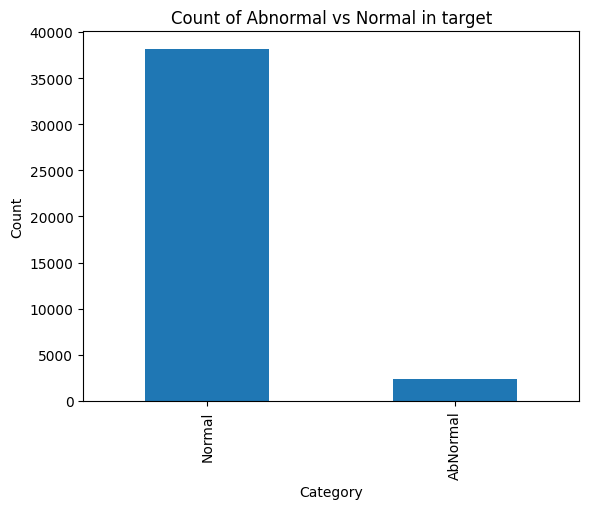

In [13]:
target_counts = traindata['target'].value_counts()

target_counts.plot(kind='bar')

plt.title('Count of Abnormal vs Normal in target')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()